 # Crash Course in Statistical Learning Worked Examples 

Name - Viral Jangale    
NUID - 002654463     
Topic- Diamond Price Prediction with regression

### Abstract: 

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.The objective is to predict the prices with different attributes and peforming multiple regression algorithms.

### `FEATURES`
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

## `Importing libraries`
In most programming languages, including Python, libraries are collections of pre-existing code that provide additional functionality to your program. Libraries can include code for a variety of purposes, such as data manipulation, data visualization, machine learning, and more.



In [1]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore warnigns
import warnings
warnings.filterwarnings('ignore')


## Import dataset
To import a dataset in Python, you can use various libraries depending on the file format of your dataset. 

In [2]:
data = pd.read_csv("https://github.com/Viral-28/Datascience/raw/main/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75



## Overview of the Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


#### `Removing unnamed column`
If we have an unnamed column in a pandas DataFrame and we want to remove it, we can do so using the drop() method. The unnamed column is usually created when reading in a CSV file that has an extra comma at the end of each row.

In [4]:
data.drop(["Unnamed: 0"] , axis=1,inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.describe(percentiles=[0.05,0.1,0.25,0.75,0.9,0.95]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
carat,53940.0,0.797940,0.474011,0.2,0.30,0.31,0.40,0.70,1.04,1.51,1.70,5.01
depth,53940.0,61.749405,1.432621,43.0,59.30,60.00,61.00,61.80,62.50,63.30,63.80,79.00
table,53940.0,57.457184,2.234491,43.0,54.00,55.00,56.00,57.00,59.00,60.00,61.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,544.00,646.00,950.00,2401.00,5324.25,9821.00,13107.10,18823.00
x,53940.0,5.731157,1.121761,0.0,4.29,4.36,4.71,5.70,6.54,7.31,7.66,10.74
y,53940.0,5.734526,1.142135,0.0,4.30,4.36,4.72,5.71,6.54,7.30,7.65,58.90
z,53940.0,3.538734,0.705699,0.0,2.65,2.69,2.91,3.53,4.04,4.52,4.73,31.80


We have observed that price has some outliers.         
Lets observe it with more information

In [6]:
data.describe(percentiles=[0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,90%,95%,96%,97%,98%,99%,max
carat,53940.0,0.797940,0.474011,0.2,0.70,1.51,1.70,1.98,2.01,2.04,2.18,5.01
depth,53940.0,61.749405,1.432621,43.0,61.80,63.30,63.80,63.90,64.20,64.70,65.60,79.00
table,53940.0,57.457184,2.234491,43.0,57.00,60.00,61.00,62.00,62.00,63.00,64.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,2401.00,9821.00,13107.10,14015.32,15072.83,16170.22,17378.22,18823.00
x,53940.0,5.731157,1.121761,0.0,5.70,7.31,7.66,7.88,8.07,8.18,8.36,10.74
y,53940.0,5.734526,1.142135,0.0,5.71,7.30,7.65,7.85,8.05,8.17,8.34,58.90
z,53940.0,3.538734,0.705699,0.0,3.53,4.52,4.73,4.85,4.98,5.05,5.15,31.80


### Check for null values
To check for null values in a pandas DataFrame, you can use the isnull() method, which returns a DataFrame of the same shape as the original but with boolean values indicating where each value is missing (True) or not (False).You can then use the sum() method on the resulting DataFrame to count the number of null values in each column.

In [7]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Checking for Duplicated values
To check for duplicated values in a pandas DataFrame, you can use the duplicated() method, which returns a boolean Series indicating which rows are duplicates of previous rows. By default, it considers all columns when identifying duplicates, but you can also specify a subset of columns to consider using the subset parameter

In [8]:
data.shape

(53940, 10)

In [9]:
data.duplicated().sum()

146

# `Exploratory Data Analysis`
EDA stands for Exploratory Data Analysis. It is the process of examining and analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. The goal of EDA is to gain an understanding of the data, identify patterns and relationships, and detect anomalies and outliers.

EDA typically involves a variety of techniques, including data cleaning and preparation, descriptive statistics, visualizations such as scatterplots and histograms, and statistical inference. The ultimate aim of EDA is to generate hypotheses about the underlying data generating process and to guide the selection of appropriate modeling techniques.

#Univariate Analysis
Univariate analysis is a statistical analysis technique that focuses on examining the distribution and characteristics of a single variable at a time. In other words, it involves analyzing a single variable in isolation, without considering the relationships between that variable and other variables

###  Cut

In [11]:
data['cut'].value_counts(normalize=True) 

Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: cut, dtype: float64

In [12]:
data.cut.describe()

count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object

[Text(0.5, 0, 'Cut'), Text(0, 0.5, 'Frequency of cuts')]

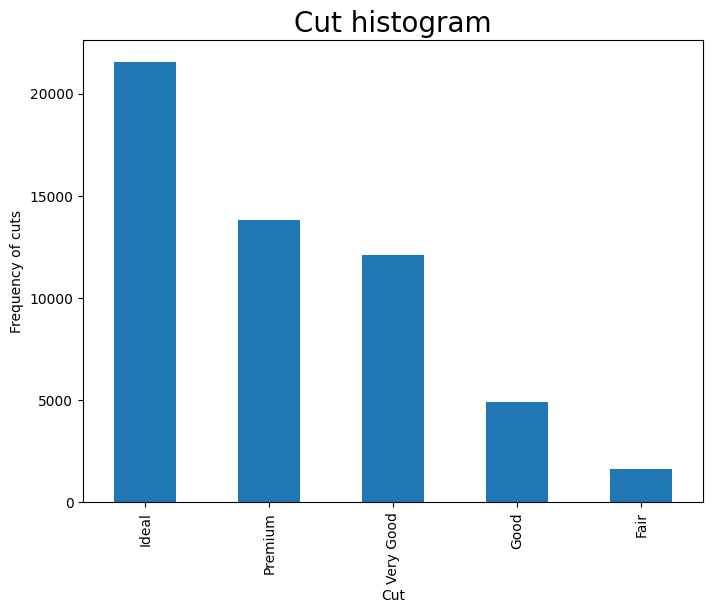

In [14]:
plt.figure(figsize=(8, 6))
plt1 = data.cut.value_counts().plot(kind='bar')
plt.title('Cut histogram', fontsize=20)
plt1.set(xlabel = 'Cut', ylabel='Frequency of cuts')

Here, frequency of ideal cut is maximum and fair cut is minimum

<Axes: ylabel='cut'>

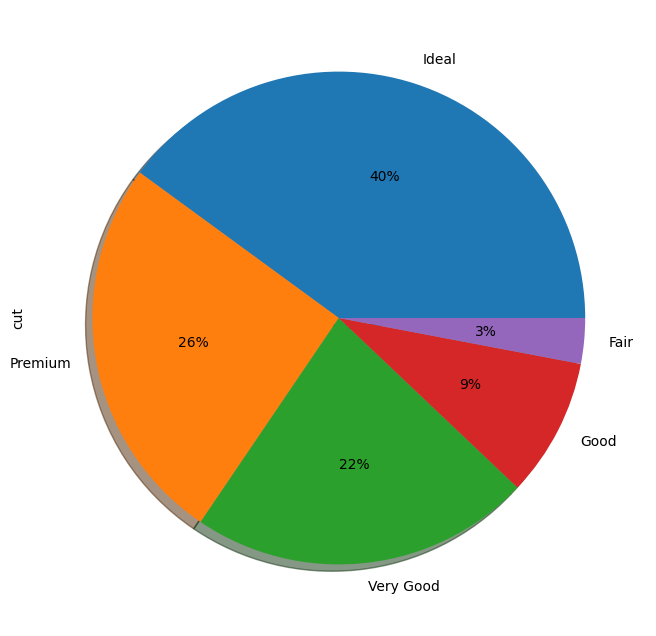

In [15]:
plt.figure(figsize=(10,8))
s = data["cut"].value_counts(ascending=False).plot(kind ="pie", autopct='%1.0f%%', shadow=True)
s

The analysis presented above provides insights that suggest the existence of 5 cuts. Moreover, the analysis highlights the fact that Ideal emerges as the most frequently preferred  cut by customers, while fair appears to be the least favored, with a comparatively lower preference frequency.







### Price

In [16]:
data.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

<Axes: >

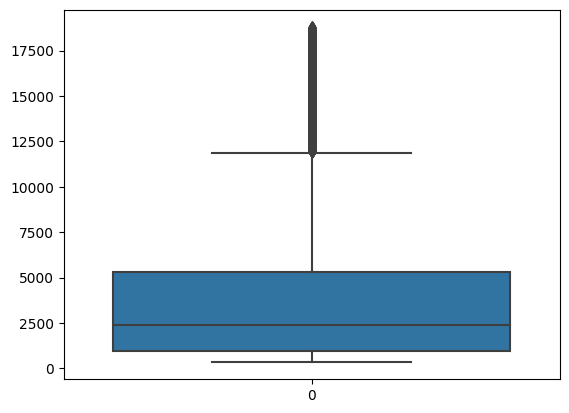

In [17]:
sns.boxplot(data['price'])

The information provided pertains to the prices of diamonds, and the following conclusions can be drawn:  
The data shows some outliers that may be attributed to various factors.

<Axes: xlabel='price', ylabel='Density'>

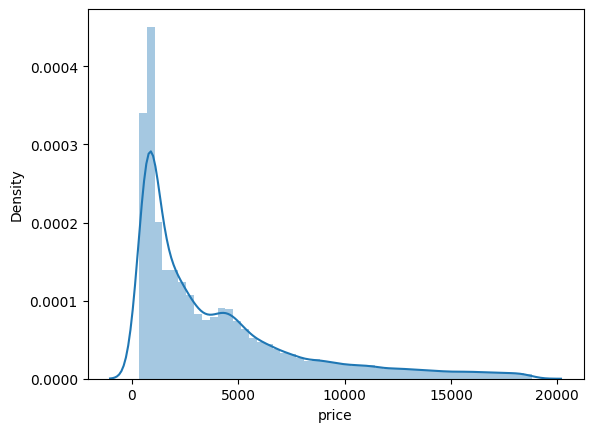

In [18]:
sns.distplot(data['price'])

The analysis of the data indicates the following observations:

The mean value of the prices is approximately 2000.
However, the median value of the prices is around 7500, indicating that the distribution is skewed towards lower values.

# Bivariate Analysis ( Numerical - Numerical)
Bivariate analysis is the process of analyzing the relationship between two variables. When both variables are numerical, we can perform numerical-nuermical bivariate analysis to identify any relationship or correlation between them.

The most commonly used technique for numerical-numerical bivariate analysis is the Pearson correlation coefficient, which measures the linear relationship between two variables. The Pearson correlation coefficient ranges from -1 to +1, with values closer to +1 indicating a strong positive relationship, values closer to -1 indicating a strong negative relationship, and values close to 0 indicating no relationship.

## 1. How is the price affected with different tables.

To visualize and to gain insights into how ticket prices vary based on the number of days left until the trip, we can calculate the average price for each day and plot the results. This can help us identify any patterns or trends in the data.

In [19]:
df_temp = data.groupby(['table'])['price'].mean().reset_index()
df_temp

,table,price
0,43.0,4997.0
1,44.0,474.0
2,49.0,2290.5
3,50.0,8995.5
4,50.1,3353.0
...,...,...
122,71.0,1633.0
123,73.0,2406.5
124,76.0,2362.0
125,79.0,2301.0


<Axes: xlabel='table', ylabel='price'>

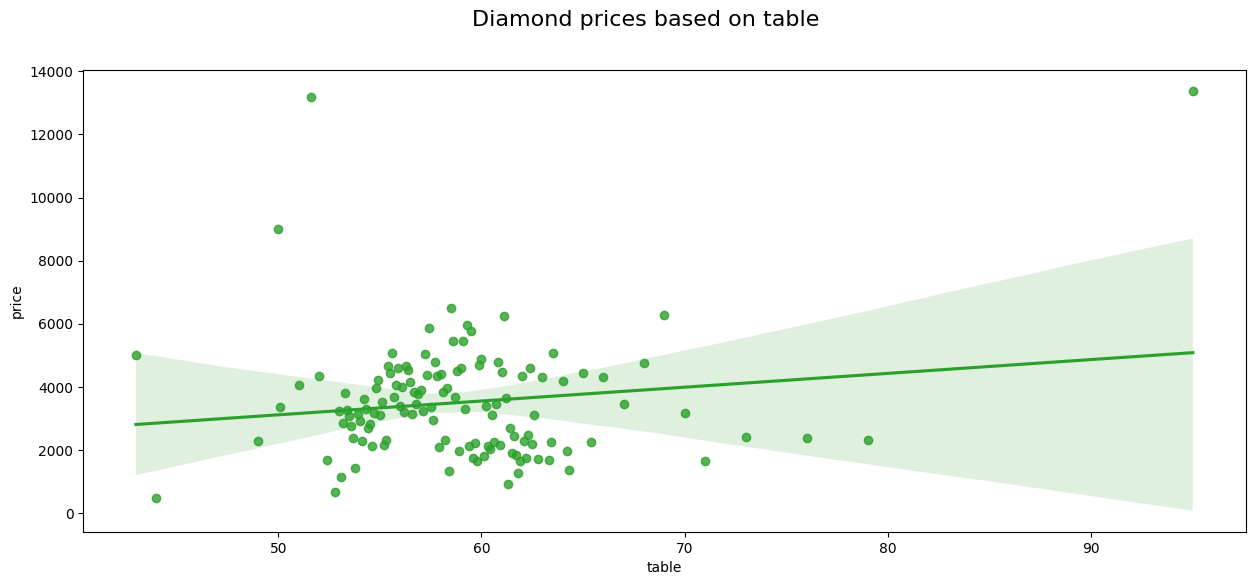

In [23]:
plt.figure(figsize=(15,6)).suptitle('Diamond prices based on table', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["table"]==1].table, y=df_temp.loc[df_temp["table"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["table"]>1)&(df_temp["table"]<20)].table, y=df_temp.loc[(df_temp["table"]>1)&(df_temp["table"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["table"]>=20].table, y=df_temp.loc[df_temp["table"]>=20].price, fit_reg=True, ax=ax)

The graph displays the average prices is 2k to 4k
The prices show a slow decrease initially, but then begin to rise rapidly around table 90.
However, just before 60, the prices fall significantly and may be up to three times cheaper than the earlier prices.
This pattern can be attributed to the diamond companies' strategy keeping table below 90 to attract most customers.






# 2. Does the price change with depth of diamond dimension?

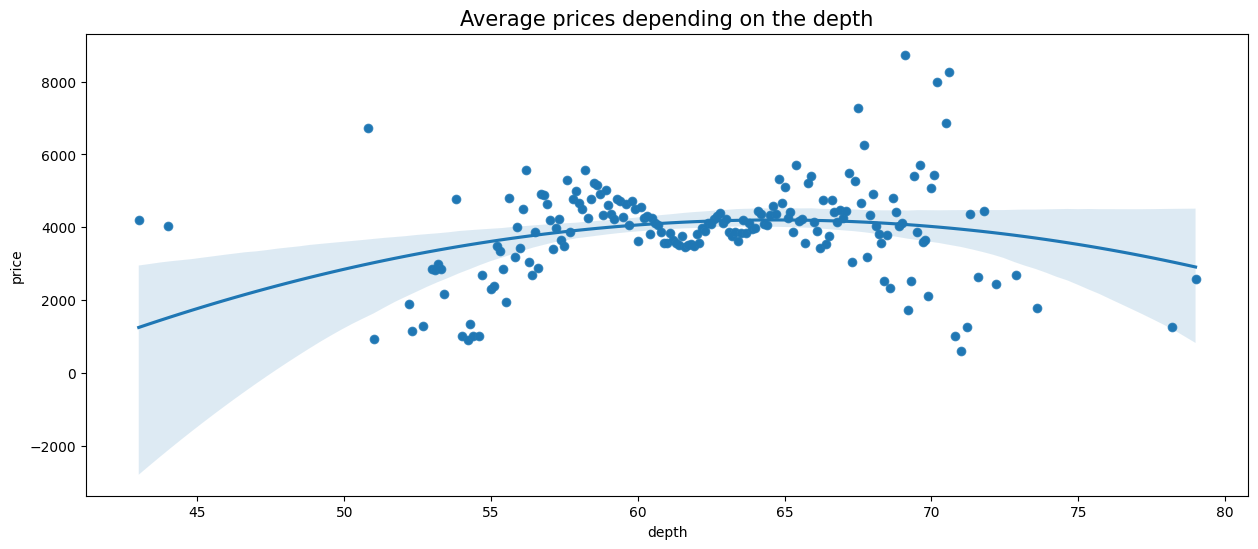

In [24]:
# Let's see how this works
df_temp = data.groupby(['depth'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="depth", y="price", data=df_temp).set_title("Average prices depending on the depth",fontsize=15)
ax = sns.regplot(x="depth", y="price", data=df_temp, order=2)

The relationship between the variables being analyzed does not appear to be linear, and can be approximated by a second-degree polynomial curve. The data indicates that the prices increase steadily up to a depth of 65, and then start to decrease again. However, there are some outliers that may be affecting the accuracy of the regression curve.

## Correlation Matrix
A correlation matrix is a table that shows the correlation coefficients between pairs of variables in a dataset. It is a useful tool for identifying relationships and dependencies between variables, and is commonly used in data analysis and statistical modeling.

To create a correlation matrix in Python, you can use the corr() method of a pandas DataFrame.

<Axes: >

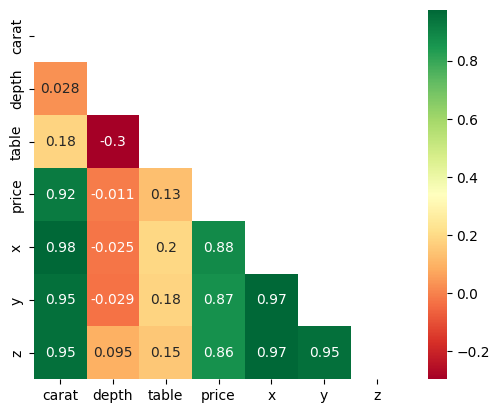

In [25]:
# Correlation
corr= data.corr()
# Getting the Upper Triangle of the correlation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix,cmap='RdYlGn',square=True)

The data suggests that there is no significant correlation between the numerical independent and dependent variables.

# `Bivariate Analysis` ( Categorical - Categorical)
Bivariate analysis is the process of analyzing the relationship between two variables. When both variables are categorical, we can perform categorical-categorical bivariate analysis to identify any relationship or association between them.

One common technique for categorical-categorical bivariate analysis is the chi-square test of independence, which tests whether two categorical variables are independent or not. The test calculates a chi-square statistic and compares it to a critical value based on the degrees of freedom and level of significance.

To perform a chi-square test of independence in Python, you can use the chi2_contingency() function from the scipy.stats module

Categorical features - Clarity, Color

### 3. How does the price varies between different colors.

In [26]:
pd.crosstab(data['clarity'], data['color'])

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,42,102,143,150,162,92,50
IF,73,158,385,681,299,143,51
SI1,2083,2426,2131,1976,2275,1424,750
SI2,1370,1713,1609,1548,1563,912,479
VS1,705,1281,1364,2148,1169,962,542
VS2,1697,2470,2201,2347,1643,1169,731
VVS1,252,656,734,999,585,355,74
VVS2,553,991,975,1443,608,365,131


<Axes: xlabel='color', ylabel='clarity'>

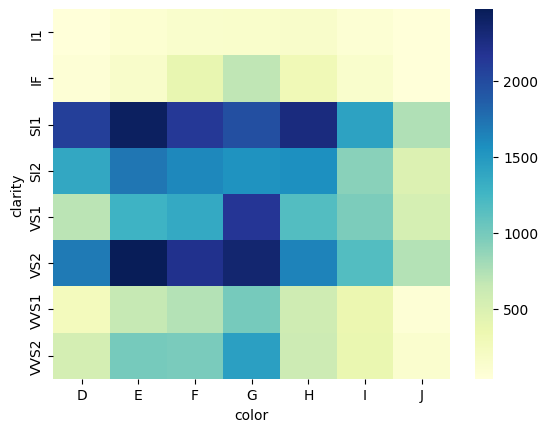

In [27]:
sns.heatmap(pd.crosstab(data['clarity'], data['color']),cmap="YlGnBu")

The analysis of the data provides the following insights:

The chart displays the number of diamonds, categorized by the clarity and color.
L1 has below 500 whereas VS2 and SL1 has more than 2000.

### Features - Cut , Color

In [28]:
pd.crosstab(data['cut'], data['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


The chart displays the number of customers buy diamonds based on cut and color. It also shows G color and ideal cut has the maximum no of buyers. Fair cut is deliberately low in J color.

# Bivariate Analysis ( Categorical - Numerical)
Bivariate analysis is the process of analyzing the relationship between two variables. When one variable is categorical and the other is numerical, we can perform categorical-numerical bivariate analysis to identify any relationship or association between them.

One common technique for categorical-numerical bivariate analysis is the t-test, which tests whether the means of a numerical variable differ significantly between different groups defined by a categorical variable. Specifically, we can perform an independent t-test if the groups are independent (i.e., each observation belongs to only one group) or a paired t-test if the groups are dependent (i.e., each observation belongs to both groups).

To perform a t-test in Python, you can use the ttest_ind() function from the scipy.stats module for independent samples or the ttest_rel() function for dependent samples. 

In [29]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Categorical feature - Cut, Color,  Numerical feature - Price
A categorical feature is a variable that can take on a limited number of possible values, which are usually nominal or ordinal. Nominal categories have no inherent order, such as colors or categories of objects, while ordinal categories have a natural ordering, such as ranks or levels of education.

Categorical features are often represented using discrete values or strings, and are commonly used in machine learning algorithms for tasks such as classification and clustering. However, many algorithms require numerical inputs, so categorical features may need to be encoded or transformed in some way before they can be used in these algorithms.

## 4. Does price vary with Carat?

In [30]:
data.groupby('carat')['price'].mean().sort_values(ascending = False) # Average Price of each airline company

carat
3.51    18701.000000
2.67    18686.000000
4.50    18531.000000
5.01    18018.000000
2.57    17841.666667
            ...     
0.24      505.185039
0.23      486.143345
0.22      391.400000
0.21      380.222222
0.20      365.166667
Name: price, Length: 273, dtype: float64

Text(0.5, 1.0, 'Diamond prices based on color and clarity')

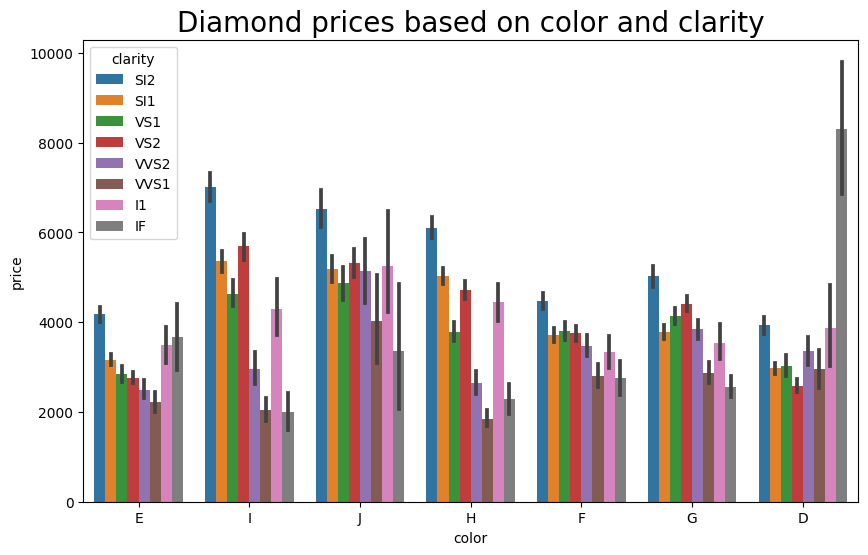

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='color',y='price',hue="clarity",data=data.sort_values("price")).set_title('Diamond prices based on color and clarity',fontsize=20)

The analysis of the data reveals the following insights:

The chart displays the number of I color and S12 Clarity has highest prices amongst all the other colors whereas  WS1 of I has the lowest price. Basically the prices varies with respect to colors as well as their particular clarity. Every minimum clarity and color counts. 

### Categorical feature - Carat,  Numerical feature - Price
A dataset may contain both categorical and numerical features. Categorical features are those that take on a limited number of values, while numerical features are those that take on continuous or discrete numerical values.

In many cases, machine learning algorithms require all features to be numerical, so categorical features may need to be transformed or encoded in some way before they can be used in these algorithms. One common technique for encoding categorical features is one-hot encoding, which creates a binary indicator variable for each category in a feature.

Numerical features can be further classified into two types: discrete and continuous. Discrete numerical features take on integer values only, while continuous numerical features can take on any real value within a certain range. Machine learning algorithms may treat these two types of numerical features differently, so it is important to know which type of numerical feature you are working with.

Bivariate analysis between categorical and numerical features can be performed using techniques such as a t-test, ANOVA, or regression analysis. These techniques can help identify any relationship or association between the categorical and numerical features, and can be useful in developing predictive models.

In [74]:
data.groupby('carat')['price'].mean().sort_values(ascending = False) # average price of each class

carat
J_J    5323.818020
I_I    5091.874954
H_H    4486.669196
G_G    3999.135671
F_F    3724.886397
D_D    3169.954096
E_E    3076.752475
Name: price, dtype: float64

[Text(0.5, 0, 'Carat'), Text(0, 0.5, 'Average Price')]

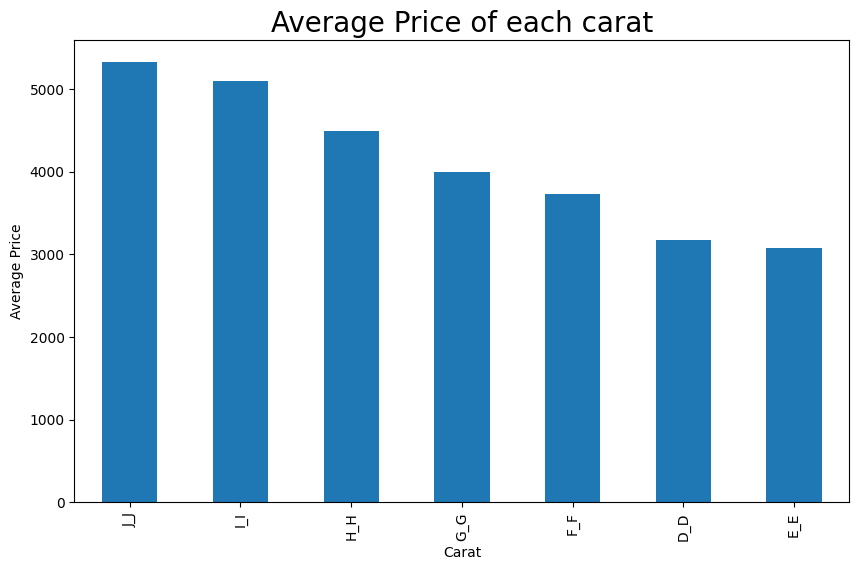

In [73]:
plt.figure(figsize=(10, 6))
plt1 = data.groupby('carat')['price'].mean().sort_values(ascending = False).plot(kind='bar')
plt.title('Average Price of each carat', fontsize=20)
plt1.set(xlabel = 'Carat', ylabel='Average Price')

Average prices of I-I carat is much higher in comparison to E-E

In [37]:
data.groupby(['color']).agg({"price":['mean','max','min','std']})

price                         
              mean    max  min          std
color                                      
D      3169.954096  18693  357  3356.590935
E      3076.752475  18731  326  3344.158685
F      3724.886397  18791  342  3784.992007
G      3999.135671  18818  354  4051.102846
H      4486.669196  18803  337  4215.944171
I      5091.874954  18823  334  4722.387604
J      5323.818020  18710  335  4438.187251

## Outliers Treatment
Outliers are data points that are significantly different from other data points in a dataset. Outliers can occur due to a variety of reasons, such as measurement error, data entry errors, or genuine extreme values. Outliers can have a significant impact on the results of statistical analyses and machine learning algorithms, so it is important to identify and treat outliers before performing any analysis.

There are several techniques for treating outliers in a dataset. Here are some common techniques:

Removal: One simple way to treat outliers is to remove them from the dataset. However, this can be problematic if the outliers represent genuine extreme values or if they are present in a large proportion of the dataset.

Winsorization: Winsorization is a technique in which the extreme values in a dataset are replaced with values that are closer to the rest of the data. For example, the upper and lower values can be replaced with the highest and lowest non-outlier values in the dataset, respectively.

Transformation: Data transformation techniques such as log transformation, square root transformation, or Box-Cox transformation can be used to reduce the impact of outliers on statistical analyses or machine learning algorithms.

Imputation: Imputation is the process of replacing missing or outlier values with estimated values. There are various imputation techniques available, such as mean imputation, median imputation, or regression imputation.

In [39]:
data.describe(percentiles=[0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,90%,95%,96%,97%,98%,99%,max
carat,53940.0,0.797940,0.474011,0.2,0.70,1.51,1.70,1.98,2.01,2.04,2.18,5.01
depth,53940.0,61.749405,1.432621,43.0,61.80,63.30,63.80,63.90,64.20,64.70,65.60,79.00
table,53940.0,57.457184,2.234491,43.0,57.00,60.00,61.00,62.00,62.00,63.00,64.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,2401.00,9821.00,13107.10,14015.32,15072.83,16170.22,17378.22,18823.00
x,53940.0,5.731157,1.121761,0.0,5.70,7.31,7.66,7.88,8.07,8.18,8.36,10.74
y,53940.0,5.734526,1.142135,0.0,5.71,7.30,7.65,7.85,8.05,8.17,8.34,58.90
z,53940.0,3.538734,0.705699,0.0,3.53,4.52,4.73,4.85,4.98,5.05,5.15,31.80


### Price

In [40]:
data[data['price']>=100000]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [41]:
## 108 values are very less as compare to our total no to rows, se lets also replace these values with median

data['price'] = np.where(data['price']>=100000 ,data['price'].median(),data['price'])

In [42]:
#Lets check the changes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


## Feature engineering
Feature engineering is the process of transforming raw data into features that can be used in machine learning models to improve their accuracy and performance. Feature engineering involves selecting, extracting, transforming, and combining relevant features from the raw data to create new features that better represent the underlying patterns and relationships in the data.

Some common techniques used in feature engineering include:

Feature selection: This involves selecting a subset of the most relevant features from the raw data. This can be done using various techniques such as correlation analysis, feature importance scores, or domain knowledge.

Feature extraction: This involves transforming the raw data into a set of meaningful features that can be used in machine learning models. Feature extraction techniques include principal component analysis (PCA), singular value decomposition (SVD), and linear discriminant analysis (LDA).

Feature transformation: This involves transforming the features to a new representation that can better capture the underlying patterns and relationships in the data. Common transformation techniques include normalization, scaling, and binning.

Feature combination: This involves combining multiple features into a single feature to create a more informative feature. This can be done using techniques such as feature interactions or feature cross-products.

In [44]:

data['carat'] = data['color'] + "_" + data['color']
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,E_E,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,E_E,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,E_E,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,I_I,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,J_J,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [45]:
data.drop(['clarity','depth'] , axis=1,inplace=True)
data.head()

,carat,cut,color,table,price,x,y,z
0,E_E,Ideal,E,55.0,326.0,3.95,3.98,2.43
1,E_E,Premium,E,61.0,326.0,3.89,3.84,2.31
2,E_E,Good,E,65.0,327.0,4.05,4.07,2.31
3,I_I,Premium,I,58.0,334.0,4.20,4.23,2.63
4,J_J,Good,J,58.0,335.0,4.34,4.35,2.75


## Dummies Creation
Creating dummy variables is a common technique used in feature engineering for categorical variables. A dummy variable is a binary variable that indicates the presence or absence of a certain category in a categorical variable.

To create dummy variables, each unique category in a categorical variable is converted into a new binary variable with a value of 1 if the category is present in the observation and 0 otherwise. For example, suppose we have a categorical variable "color" with categories "red", "green", and "blue". To create dummy variables for this variable, we would create three new binary variables "red", "green", and "blue". If an observation has the category "red", the "red" variable would have a value of 1 and the "green" and "blue" variables would have a value of 0. If an observation has the category "green", the "green" variable would have a value of 1 and the "red" and "blue" variables would have a value of 0.

Creating dummy variables is important because many machine learning algorithms cannot handle categorical variables directly. By converting categorical variables into dummy variables, we can use them as input in machine learning algorithms. Additionally, creating dummy variables can help us capture the relationship between the categories and the target variable in a more meaningful way.

In [49]:
df = pd.get_dummies(data=data,drop_first=True)
df.head()

,table,price,x,y,z,carat_E_E,carat_F_F,carat_G_G,carat_H_H,carat_I_I,...,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,55.0,326.0,3.95,3.98,2.43,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,61.0,326.0,3.89,3.84,2.31,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,65.0,327.0,4.05,4.07,2.31,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,58.0,334.0,4.20,4.23,2.63,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,58.0,335.0,4.34,4.35,2.75,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [50]:
df.shape

(53940, 21)

# Model Training
Model training is the process of using a labeled dataset and a machine learning algorithm to learn the patterns and relationships in the data and create a predictive model. This involves preparing and transforming the data, selecting an appropriate algorithm, training the model, evaluating its performance, fine-tuning the model parameters, and deploying the trained model. The goal of model training is to create a model that accurately predicts outcomes on new, unlabeled data and can be used to make decisions or solve problems in various fields such as finance, healthcare, and marketing. Python provides various libraries to train machine learning models, and the specific steps and implementation depend on the choice of algorithm and the task at hand.






In [51]:
# Separating dependent and independent variables
x= df.drop(["price"], axis=1)
y = df["price"]

In [52]:
# splitting the dataset
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=56)

In [53]:
x_train.shape

(37758, 20)

# Linear regression
Linear regression is a statistical method used to model the relationship between a dependent variable (usually denoted as y) and one or more independent variables (usually denoted as x). It assumes a linear relationship between the variables, meaning that the change in the dependent variable is proportional to the change in the independent variable(s). In a simple linear regression, there is only one independent variable, while in a multiple linear regression, there are multiple independent variables. The goal of linear regression is to find the best-fitting line or hyperplane that describes the relationship between the variables. This line or hyperplane can then be used to make predictions on new, unseen data. In Python, we can use the scikit-learn library to perform linear regression

In [55]:
# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fitting data
scaler.fit(x_train)

#transforming data onto x adn y train
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Scaling data is a process of transforming the features of a dataset to a similar scale or range. This process is important in machine learning because many algorithms assume that all features are on the same scale, and having features with different scales can cause problems such as biased results and poor model performance. Scaling data can also help reduce the computation time and improve the numerical stability of the algorithms.There are different scaling techniques available, such as standardization, min-max scaling, and robust scaling. Standardization, also known as Z-score normalization, scales the data to have a mean of 0 and a standard deviation of 1. Min-max scaling, on the other hand, scales the data to a range between 0 and 1. Robust scaling is a technique that scales the data based on the interquartile range, which makes it more robust to outliers.



In [56]:
x_train.shape, x_test.shape

((37758, 20), (16182, 20))

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

x_train , x_test ,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=56)

In [58]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.8016628564713771

In [59]:
## for making model more efficient
resduals = []
for i in range(0,101):
    x_train , x_test ,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=i)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    resduals.append(r2_score(y_test,y_pred))

There are different scaling techniques available, such as standardization, min-max scaling, and robust scaling. Standardization, also known as Z-score normalization, scales the data to have a mean of 0 and a standard deviation of 1. Min-max scaling, on the other hand, scales the data to a range between 0 and 1. Robust scaling is a technique that scales the data based on the interquartile range, which makes it more robust to outliers.



In [60]:
# greatest r2 score 
np.argmax(resduals)

87

In [61]:
x_train , x_test ,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=85)


lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print( "Train score is :-", lr.score(x_train,y_train))
print( "Test score is :-", r2_score(y_test,y_pred_lr))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_lr))



Train score is :- 0.7978774748317046
Test score is :- 0.7891403492784422
MAE = 1353.6187832916328


Scikit-learn (or sklearn) is a popular machine learning library in Python that provides various modules and functions to build and evaluate machine learning models.Mean Squared Error (MSE): It measures the average of the squared differences between the predicted and actual values of the target variable. A lower MSE value indicates better model performance.

R-squared (R²) score: It measures the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model. A higher R² score indicates better model performance.

Mean Absolute Error (MAE): It measures the

In [62]:
from sklearn.metrics import r2_score, mean_absolute_error ,mean_squared_error

lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))


## Decision Tree
Decision tree is a popular machine learning algorithm used for both regression and classification tasks. It works by recursively partitioning the data into subsets based on the values of the independent variables, and then making a prediction based on the majority class or mean value of the target variable in each subset. The decision tree algorithm selects the best variable to split the data at each node based on a criterion such as Gini impurity or information gain. The resulting tree structure can be visualized and interpreted, and can also be used to make predictions on new data. Decision trees are easy to understand and implement, but can suffer from overfitting if not properly tuned. Ensemble methods such as Random Forest and Gradient Boosting can be used to improve the performance and reduce overfitting of decision trees.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt1 = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {"max_depth" : (100,120,150,),
              "max_features" : ("auto","sqrt","log2"),
              "max_leaf_nodes" : (3,4,5),
              "min_samples_split" : (4,6,8,10),
              "min_samples_leaf" : (2,3,4,5,6)}

GSV stands for Grid Search Validation, which is a technique used in machine learning to find the optimal hyperparameters of a model. Hyperparameters are the parameters of a model that are set before training and affect the learning process, such as learning rate, regularization strength, and number of hidden layers. Grid search validation involves specifying a range of values for each hyperparameter and exhaustively searching all possible combinations of hyperparameters to find the set of values that results in the best performance on a validation set. This is typically done using cross-validation, where the dataset is split into k-folds and the model is trained and validated k times on different subsets of the data. 

In [ ]:
dt_grid = GridSearchCV(dt1 , param_grid=parameters,refit=True, n_jobs=-1,cv=10,verbose=2)
dt_grid

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': (100, 120, 150),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'max_leaf_nodes': (3, 4, 5),
                         'min_samples_leaf': (2, 3, 4, 5, 6),
                         'min_samples_split': (4, 6, 8, 10)},
             verbose=2)

Fitting the model is the process of training a machine learning algorithm on a dataset to learn the underlying patterns and relationships between the independent and target variables. In supervised learning, the algorithm is trained on a labeled dataset where the independent variables and corresponding target variable are known. The process of fitting the model involves feeding the dataset into the algorithm and adjusting its internal parameters to minimize the error between the predicted and actual values of the target variable. This is done using an optimization algorithm such as gradient descent or stochastic gradient descent. Once the model is fitted, it can be used to make predictions on new, unseen data. In Python, the fit() method is used to train the algorithm on the dataset, and the resulting model can be used to make predictions using the predict() method. It is important to properly evaluate the performance of the fitted model using metrics such as accuracy, precision, recall, and F1-score to ensure that it is generalizing well to new data.

In [ ]:
# fitting the model
dt_grid.fit(x_train,y_train)

#predicting y
y_pred_dt = dt_grid.predict(x_test)


print(dt_grid.best_params_ )
print("Train Score is :-" , dt_grid.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_dt))

In [ ]:
params = {"max_depth" : (100,90,80,),
              "max_features" : ("auto","sqrt"),
              "max_leaf_nodes" : (2,5,7),
              "min_samples_split" : (4,5,3),
              "min_samples_leaf" : (2,3)}

dt_grid2 = GridSearchCV(dt1 , param_grid=params,refit=True, n_jobs=-1,cv=10,verbose=2)

# fitting the model
dt_grid2.fit(x_train,y_train)

#predicting y
y_pred_dt2 = dt_grid2.predict(x_test)


print(dt_grid2.best_params_ )
print("Train Score is :-" , dt_grid2.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_dt2))

In [ ]:
dt2 =DecisionTreeRegressor(max_depth= 100,
                           max_features= 'auto',
                           max_leaf_nodes= 7,
                           min_samples_leaf= 2,
                           min_samples_split= 4,
                           random_state= 10)


# fitting the model
dt2.fit(x_train,y_train)

#predicting y
y_pred_dt = dt2.predict(x_test)

print("Train Score is :-" , dt2.score(x_train,y_train) )
print("Test Score is :-" , dt2.score(x_test,y_test))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_dt))


Train Score is :- 0.9305628302987194
Test Score is :- 0.9334226661176279
MAE = 3766.260999262443


In [ ]:
dt_r2 = r2_score(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

## Random Forest
Random forest is a popular machine learning algorithm that is used for both classification and regression tasks. It is an ensemble method that combines multiple decision trees and uses the concept of bagging to improve the accuracy and reduce overfitting. In a random forest, each decision tree is trained on a random subset of the data and a random subset of the features, and the final prediction is made by averaging the predictions of all the trees. The randomness in the selection of data and features helps to create a diverse set of trees that are less likely to overfit to the training data. Random forests are easy to use and interpret, and they can handle large datasets with high dimensionality. They also provide feature importance scores that can be used to identify the most important features in the dataset. However, they can be computationally expensive and may require tuning of hyperparameters such as the number of trees and maximum depth of the trees to achieve optimal performance.

In [63]:
from sklearn.ensemble import RandomForestRegressor

regf = RandomForestRegressor()
  
regf_params = {"n_estimators":(10,20,30),
                'max_depth':(2,3,5),
                'min_samples_split':[3,5,7],
                'min_samples_leaf':[2,4],
                'max_features':['auto','sqrt']}


Setting the max_depth parameter of a decision tree to 3 can make the tree simpler and easier to interpret, as it limits the depth of the tree to 3 levels. This means that the tree will only make decisions based on a maximum of 3 features, and will not continue to split the data into smaller subgroups beyond this depth. This can make the decision tree more readable and easier to explain to non-technical stakeholders. However, setting max_depth too low can result in underfitting, where the tree may not capture all the important patterns in the data and result in lower accuracy. It is important to balance simplicity and interpretability with accuracy and generalization when choosing the value of max_depth.

In [64]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

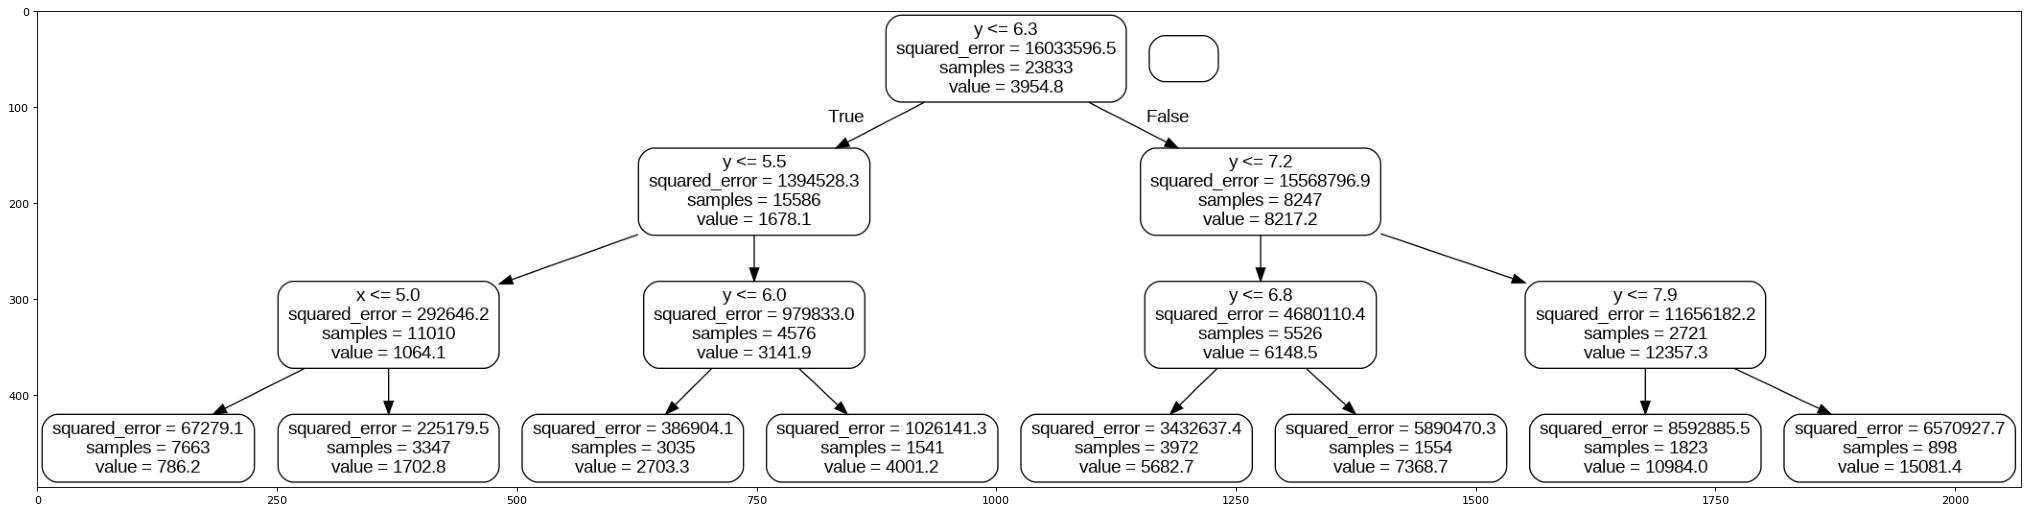

In [65]:
import pydot
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
# Visualization of Nodes for the purpose of explainability
figure(figsize=(32, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(x_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

Tuning in machine learning refers to the process of selecting the optimal hyperparameters of a model to improve its performance. Hyperparameters are parameters that are set before training the model and affect its learning process, such as the learning rate, regularization strength, number of hidden layers, and so on. Tuning is important because the default hyperparameter values in most machine learning libraries may not always be optimal for a given dataset and task, and the performance of the model can be significantly improved by selecting better hyperparameters.

In [ ]:
# Tuning
regf_params2 = {"n_estimators":(10,12,8),
                'max_depth':(4,5,6),
                'min_samples_split':[4,5,6],
                'min_samples_leaf':[3,4,5],
                'max_features':['auto','sqrt']}

rf_GS2 = GridSearchCV(estimator=regf ,param_grid=regf_params2,n_jobs=-1,cv=5,verbose=2)
rf_GS2

# fitting the model
rf_GS2.fit(x_train,y_train)

#predicting y
y_pred_rf2 = rf_GS2.predict(x_test)


print(rf_GS2.best_params_ )
print("Train Score is :-" , rf_GS2.score(x_train,y_train) )
print("Test Score is :-" , rf_GS2.score(x_test,y_test))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_rf2))

In [ ]:
rf = RandomForestRegressor(max_depth= 6,
                             max_features= 'auto',
                             min_samples_leaf= 4,
                             min_samples_split= 6,
                             n_estimators= 12)

# fitting the model
rf.fit(x_train,y_train)

#predicting y
y_pred_rf = rf.predict(x_test)

print("Train Score is :-" , rf.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_rf))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_rf))

Train Score is :- 0.941074695866789
Test Score is :- 0.9435776376368178
MAE = 3293.977521420759


In [ ]:
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# ADABoost
ADABoost, or Adaptive Boosting, is a popular ensemble learning algorithm used in machine learning for classification and regression problems. It works by combining multiple weak learners, typically decision trees with a single level of depth, to create a strong learner that can make accurate predictions. The algorithm assigns weights to each instance in the training set, and then trains a weak learner on the weighted data. The algorithm then updates the weights based on the errors made by the weak learner and trains another weak learner on the updated weights. This process is repeated until a specified number of weak learners have been trained or the accuracy on the training set reaches a certain threshold. The final prediction is made by combining the predictions of all the weak learners, weighted by their accuracy.

In [66]:
from sklearn.ensemble import AdaBoostRegressor

In [67]:
ada_boost = AdaBoostRegressor(learning_rate=0.15,random_state =85, n_estimators=100)
# fitting data
ada_boost.fit(x_train,y_train)

#Predicting value
y_pred_ada = ada_boost.predict(x_test)

Predicting the accuracy of a machine learning model is an important task in model evaluation and selection. There are several methods to predict the accuracy of a model, including cross-validation, holdout validation, and bootstrap aggregation.

Cross-validation involves dividing the dataset into multiple folds, where each fold is used as a validation set and the remaining folds are used as the training set. The process is repeated multiple times, with each fold used as the validation set once, and the accuracy of the model is averaged over all the folds.

Holdout validation involves dividing the dataset into two sets, a training set and a validation set, where the model is trained on the training set and the accuracy is evaluated on the validation set.

Bootstrap aggregation, or bagging, involves creating multiple bootstrap samples of the dataset and training a model on each sample. The accuracy of the model is then averaged over all the bootstrap samples.

The predicted accuracy of a model can also depend on the choice of evaluation metric, such as accuracy, precision, recall, F1 score, or ROC AUC score. The choice of evaluation metric depends on the nature of the problem and the specific requirements of the application

In [68]:
# predicting accuracy
print("Train Score is :-" , ada_boost.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_ada))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_ada))

Train Score is :- 0.8560581045333447
Test Score is :- 0.8512831739231902
MAE = 980.0641935530725


In [69]:
ada_r2 = r2_score(y_test, y_pred_ada)
ada_mae = mean_absolute_error(y_test, y_pred_ada)
ada_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ada))

##  XGBoost
XGBoost, or Extreme Gradient Boosting, is a popular and powerful machine learning algorithm used for both regression and classification tasks. It is an ensemble learning method that combines multiple weak learners, typically decision trees, to create a strong learner that can make accurate predictions.

XGBoost works by minimizing a specific loss function, such as mean squared error for regression or log loss for classification, using a gradient descent-based optimization method. The algorithm iteratively adds decision trees to the model, each time adjusting the weights assigned to the instances based on the errors made by the previous trees.

XGBoost has several features that make it a popular choice for machine learning tasks. It includes regularization techniques such as L1 and L2 regularization to prevent overfitting, and can handle missing values and categorical features. It also includes a variety of hyperparameters that can be tuned to optimize the performance of the model, such as the number of trees, the learning rate, and the maximum depth of each tree.

Overall, XGBoost is a powerful and flexible algorithm that can achieve high accuracy on a wide range of machine learning tasks, especially when the data is structured and there are a large number of features.


In [70]:
import xgboost as xgb

regressor=xgb.XGBRegressor(eval_metric='rmsle')

from sklearn.model_selection import GridSearchCV
# set up our search grid

In machine learning, hyperparameters are the parameters of the model that cannot be learned from the training data and need to be set manually. Examples of hyperparameters include the learning rate, regularization strength, and maximum tree depth.

Grid search is a technique for hyperparameter tuning that involves defining a grid of hyperparameters to be searched, and then evaluating the performance of the model on each combination of hyperparameters. The hyperparameters that result in the best performance are then selected as the optimal hyperparameters for the model.



In [ ]:
regressor=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 700,
                           max_depth     = 5,
                           eval_metric='rmse')

regressor.fit(x_train, y_train) 

# Predict the model
y_pred_xg = regressor.predict(x_test)

# RMSE Computation
print("Train Score is :-" ,  regressor.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_xg))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_xg))

Train Score is :- 0.9572155945652867
Test Score is :- 0.9592765475312179
MAE = 2616.6271548488826


In [ ]:
xg_r2 = r2_score(y_test, y_pred_xg)
xg_mae = mean_absolute_error(y_test, y_pred_xg)
xg_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xg))

#Conclusion

The XGBRegressor model performed the best with an R^2 score of 0.9592 and MAE score of 2616.6 on the test dataset.
Prices of diamonds rise slowly with different carats and ideal cuts.The number of customers buy diamonds based on cut and color. It also shows G color and ideal cut has the maximum no of buyers. Fair cut is deliberately low in J color.Average prices of I-I carat is much higher in comparison to E-E.


#Worked example -2

This classic dataset contains the prices and other attributes of almost 54,000 houses. It's a great dataset for beginners learning to work with data analysis and visualization.The objective is to predict the prices with different attributes and peforming multiple regression algorithms.

#Features

Dataset contains:**

Id: a notation for a house

Date: Date house was sold

Price: Price is prediction target

Bedrooms: Number of Bedrooms/House

Bathrooms: Number of bathrooms/House

Sqft_Living: square footage of the home

Sqft_Lot: square footage of the lot

Floors: Total floors (levels) in house

Waterfront: House which has a view to a waterfront

View: Has been viewed

Condition: How good the condition is ( Overall )

Grade: overall grade given to the housing unit, based on King County grading system

Sqft_Above: square footage of house apart from basement

Sqft_Basement: square footage of the basement

Yr_Built: Built Year

Yr_Renovated: Year when house was renovated

Zipcode: Zip

Lat: Latitude coordinate

Long: Longitude coordinate

Sqft_Living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

Sqft_Lot15: lotSize area in 2015(implies-- some renovations)



#Importing libraries

In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

import os
#print(os.listdir("../input"))
import warnings  
warnings.filterwarnings('ignore')


#Import dataset
To import a dataset in Python, you can use various libraries depending on the file format of your dataset.

In [79]:
dataset = pd.read_csv("https://github.com/Viral-28/Datascience/raw/main/kc_house_data.csv")

# Overview of the Data

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The data is loaded, now we will read our data. The below will give us the 5 record of our dataset.

In [83]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#Removing unnamed column
If we have an unnamed column in a pandas DataFrame and we want to remove it, we can do so using the drop() method. The unnamed column is usually created when reading in a CSV file that has an extra comma at the end of each row.

In [86]:
dataset = dataset.drop(['id','date'],axis=1)

The modified dataset will be as follows:

In [87]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [89]:
dataset.describe(percentiles=[0.05,0.1,0.25,0.75,0.9,0.95]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
price,21613.0,540088.141767,367127.196483,75000.0000,210000.0000,245000.0000,321950.000,450000.0000,645000.000,887000.0000,1.156480e+06,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,2.0000,2.0000,3.000,3.0000,4.000,4.0000,5.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.0000,1.0000,1.750,2.2500,2.500,3.0000,3.500000e+00,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,940.0000,1090.0000,1427.000,1910.0000,2550.000,3250.0000,3.760000e+03,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,1800.0000,3322.2000,5040.000,7618.0000,10688.000,21397.6000,4.333920e+04,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.0000,1.0000,1.000,1.5000,2.000,2.0000,2.000000e+00,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.000000e+00,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,2.000000e+00,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.0000,3.0000,3.000,3.0000,4.000,4.0000,5.000000e+00,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,6.0000,6.0000,7.000,7.0000,8.000,9.0000,1.000000e+01,1.300000e+01


We have observed that price has some outliers.
Lets observe it with more information

In [90]:
data.describe(percentiles=[0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,90%,95%,96%,97%,98%,99%,max
table,53940.0,57.457184,2.234491,43.0,57.00,60.00,61.00,62.00,62.00,63.00,64.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,2401.00,9821.00,13107.10,14015.32,15072.83,16170.22,17378.22,18823.00
x,53940.0,5.731157,1.121761,0.0,5.70,7.31,7.66,7.88,8.07,8.18,8.36,10.74
y,53940.0,5.734526,1.142135,0.0,5.71,7.30,7.65,7.85,8.05,8.17,8.34,58.90
z,53940.0,3.538734,0.705699,0.0,3.53,4.52,4.73,4.85,4.98,5.05,5.15,31.80


### Check for null values
To check for null values in a pandas DataFrame, you can use the isnull() method, which returns a DataFrame of the same shape as the original but with boolean values indicating where each value is missing (True) or not (False).You can then use the sum() method on the resulting DataFrame to count the number of null values in each column.

In [91]:
dataset.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#Checking for Duplicated values
To check for duplicated values in a pandas DataFrame, you can use the duplicated() method, which returns a boolean Series indicating which rows are duplicates of previous rows. By default, it considers all columns when identifying duplicates, but you can also specify a subset of columns to consider using the subset parameter

In [92]:
dataset.shape

(21613, 19)

In [93]:
data.duplicated().sum()

152

Finding Unique Values:

From the above it is clear that the dataset have no null values present, so lets check how many unique values is present for each feature. We will loop through the dataset for checking the unique values present.



In [94]:
#Lets find out how many unique values are present in each column

for value in dataset:
    print('For {},{} unique values present'.format(value,dataset[value].nunique()))

For price,4028 unique values present
For bedrooms,13 unique values present
For bathrooms,30 unique values present
For sqft_living,1038 unique values present
For sqft_lot,9782 unique values present
For floors,6 unique values present
For waterfront,2 unique values present
For view,5 unique values present
For condition,5 unique values present
For grade,12 unique values present
For sqft_above,946 unique values present
For sqft_basement,306 unique values present
For yr_built,116 unique values present
For yr_renovated,70 unique values present
For zipcode,70 unique values present
For lat,5034 unique values present
For long,752 unique values present
For sqft_living15,777 unique values present
For sqft_lot15,8689 unique values present


In [96]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# `Exploratory Data Analysis`
EDA stands for Exploratory Data Analysis. It is the process of examining and analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. The goal of EDA is to gain an understanding of the data, identify patterns and relationships, and detect anomalies and outliers.

EDA typically involves a variety of techniques, including data cleaning and preparation, descriptive statistics, visualizations such as scatterplots and histograms, and statistical inference. The ultimate aim of EDA is to generate hypotheses about the underlying data generating process and to guide the selection of appropriate modeling techniques.

#Univariate Analysis
Univariate analysis is a statistical analysis technique that focuses on examining the distribution and characteristics of a single variable at a time. In other words, it involves analyzing a single variable in isolation, without considering the relationships between that variable and other variables

#Bedrooms

In [98]:
dataset['bedrooms'].value_counts(normalize=True)

3     0.454541
4     0.318419
2     0.127701
5     0.074076
6     0.012585
1     0.009207
7     0.001758
0     0.000601
8     0.000601
9     0.000278
10    0.000139
11    0.000046
33    0.000046
Name: bedrooms, dtype: float64

In [99]:
dataset.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

[Text(0.5, 0, 'bedroom'), Text(0, 0.5, 'Frequency')]

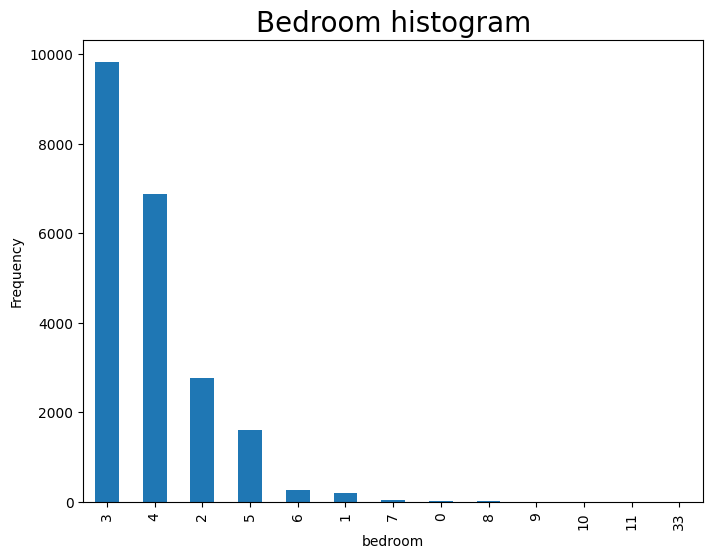

In [101]:
plt.figure(figsize=(8, 6))
plt1 = dataset.bedrooms.value_counts().plot(kind='bar')
plt.title('Bedroom histogram', fontsize=20)
plt1.set(xlabel = 'bedroom', ylabel='Frequency')

The graph analyzes that frequency of bedrooms is the highest whereas 7 and 0 bedrooms is the lowest of all. While, more than 7 bedrooms seems to be non-existent.

<Axes: ylabel='bedrooms'>

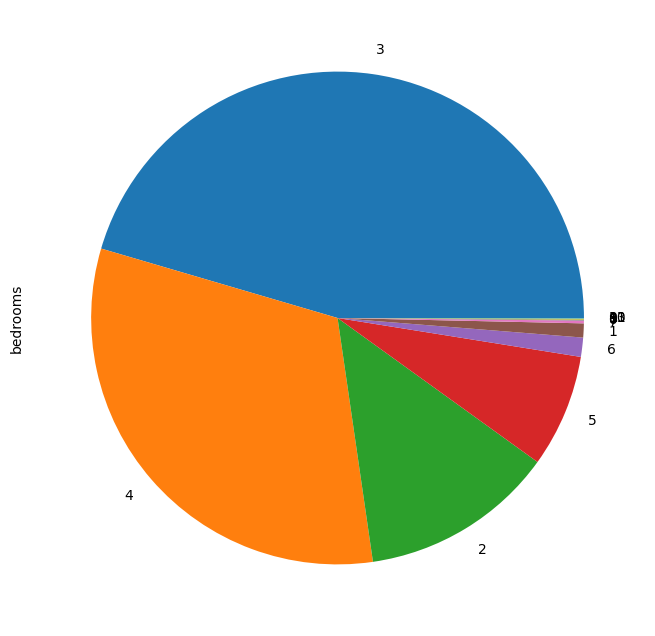

In [104]:
plt.figure(figsize=(10,8))
s = dataset["bedrooms"].value_counts(ascending=False).plot(kind ="pie")
s

Houses having 3 and 4 bedrooms are maximum.

#Price

In [106]:
dataset.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<Axes: >

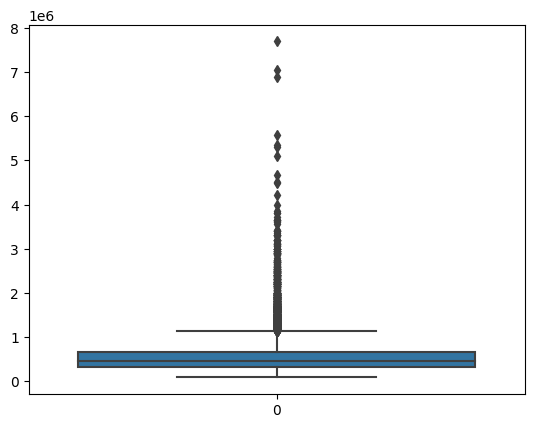

In [110]:
sns.boxplot(dataset['price'])

The information provided pertains to the prices of houses, and the following conclusions can be drawn:
The data shows some outliers that may be attributed to various factors.

<Axes: xlabel='price', ylabel='Density'>

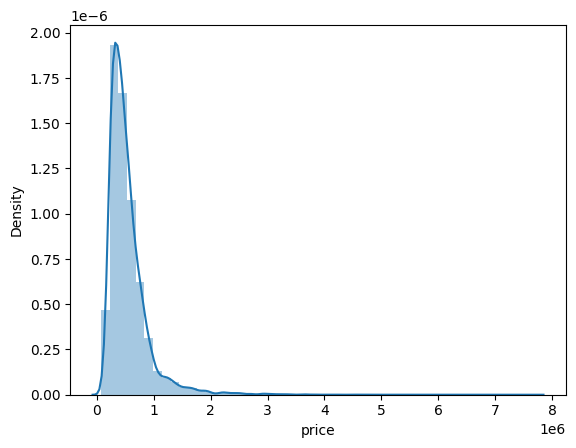

In [109]:
sns.distplot(dataset['price'])

The analysis of the data indicates the following observations:

The mean value of the prices is approximately 1.
However, the median value of the prices is around 4, indicating that the distribution is skewed towards lower values.
The dispersion of the data seems to follow a bimodal distribution, with two Gaussian curves visible on the graph.

#Bivariate Analysis ( Numerical - Numerical)
Bivariate analysis is the process of analyzing the relationship between two variables. When both variables are numerical, we can perform numerical-nuermical bivariate analysis to identify any relationship or correlation between them.

The most commonly used technique for numerical-numerical bivariate analysis is the Pearson correlation coefficient, which measures the linear relationship between two variables. The Pearson correlation coefficient ranges from -1 to +1, with values closer to +1 indicating a strong positive relationship, values closer to -1 indicating a strong negative relationship, and values close to 0 indicating no relationship.

## 1. How is the price affected with sqft_living and sqft_lot

To visualize and to gain insights into how prices vary based on the squarefeets, we can calculate the average price for each day and plot the results. This can help us identify any patterns or trends in the data

In [111]:
df_temp = dataset.groupby(['sqft_living'])['price'].mean().reset_index()
df_temp

,sqft_living,price
0,290,142000.0
1,370,276000.0
2,380,245000.0
3,384,265000.0
4,390,236500.0
...,...,...
1033,9640,4668000.0
1034,9890,6885000.0
1035,10040,7062500.0
1036,12050,7700000.0


<Axes: xlabel='sqft_living', ylabel='price'>

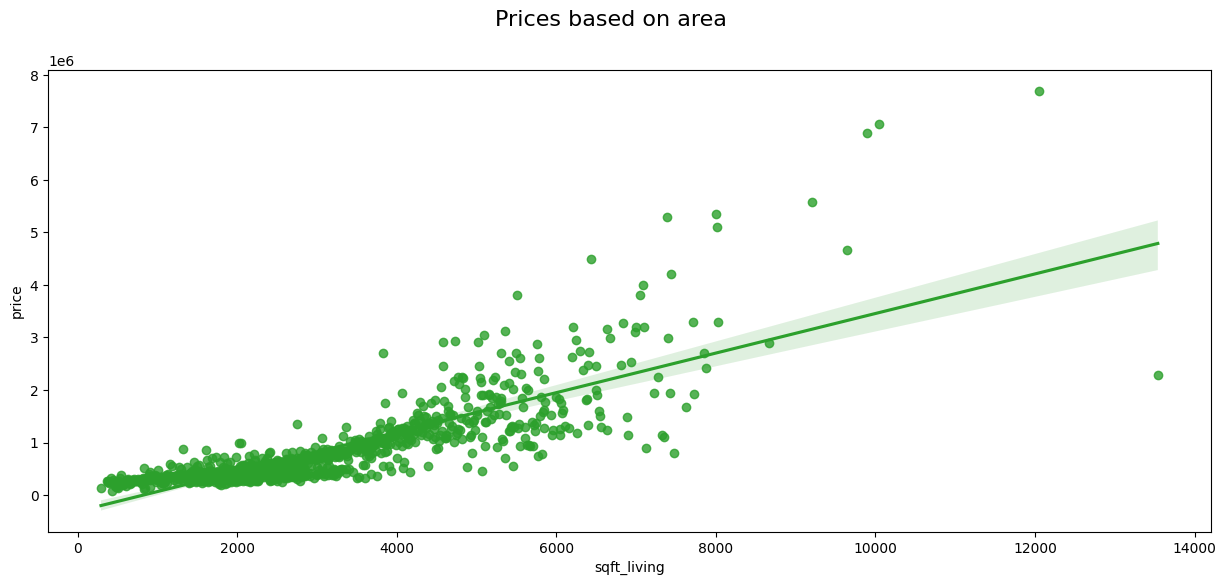

In [113]:
plt.figure(figsize=(15,6)).suptitle('Prices based on area', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["sqft_living"]==1].sqft_living, y=df_temp.loc[df_temp["sqft_living"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["sqft_living"]>1)&(df_temp["sqft_living"]<20)].sqft_living, y=df_temp.loc[(df_temp["sqft_living"]>1)&(df_temp["sqft_living"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["sqft_living"]>=20].sqft_living, y=df_temp.loc[df_temp["sqft_living"]>=20].price, fit_reg=True, ax=ax)

The graph displays the average prices as a function of the area of the house. The following observations can be made:

The prices show a gradual increase with maximum focus in squarefeet area of living room between 2000 to 4000.From there it slowly reduces.

# 2. Does the price change with the year built?

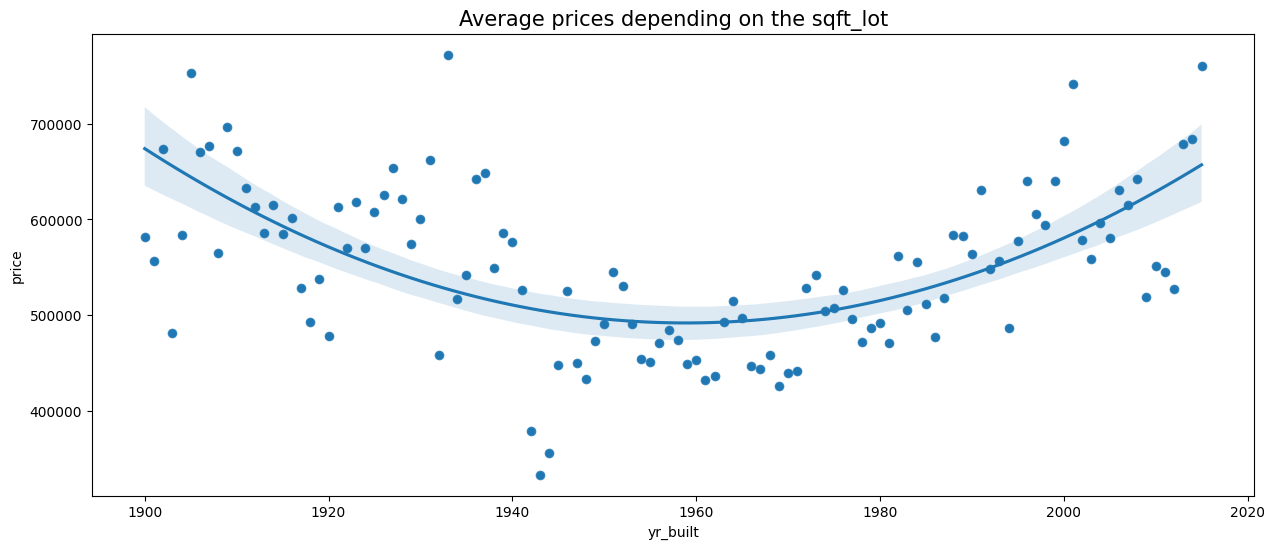

In [117]:
df_temp = dataset.groupby(['yr_built'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="yr_built", y="price", data=df_temp).set_title("Average prices depending on the sqft_lot",fontsize=15)
ax = sns.regplot(x="yr_built", y="price", data=df_temp, order=2)

The relationship between the variables being analyzed does not appear to be linear, and can be approximated by a second-degree polynomial curve. The data indicates that the prices lowers up to built year of 1960, and then start to increase again. However, there are some outliers that may be affecting the accuracy of the regression curve.

In [118]:
dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

#Data Visulaization using seaborn

So all the column data remains the same except the two column is dropped. Let's now forward with data visualization using a pairplot

<Figure size 1000x600 with 0 Axes>

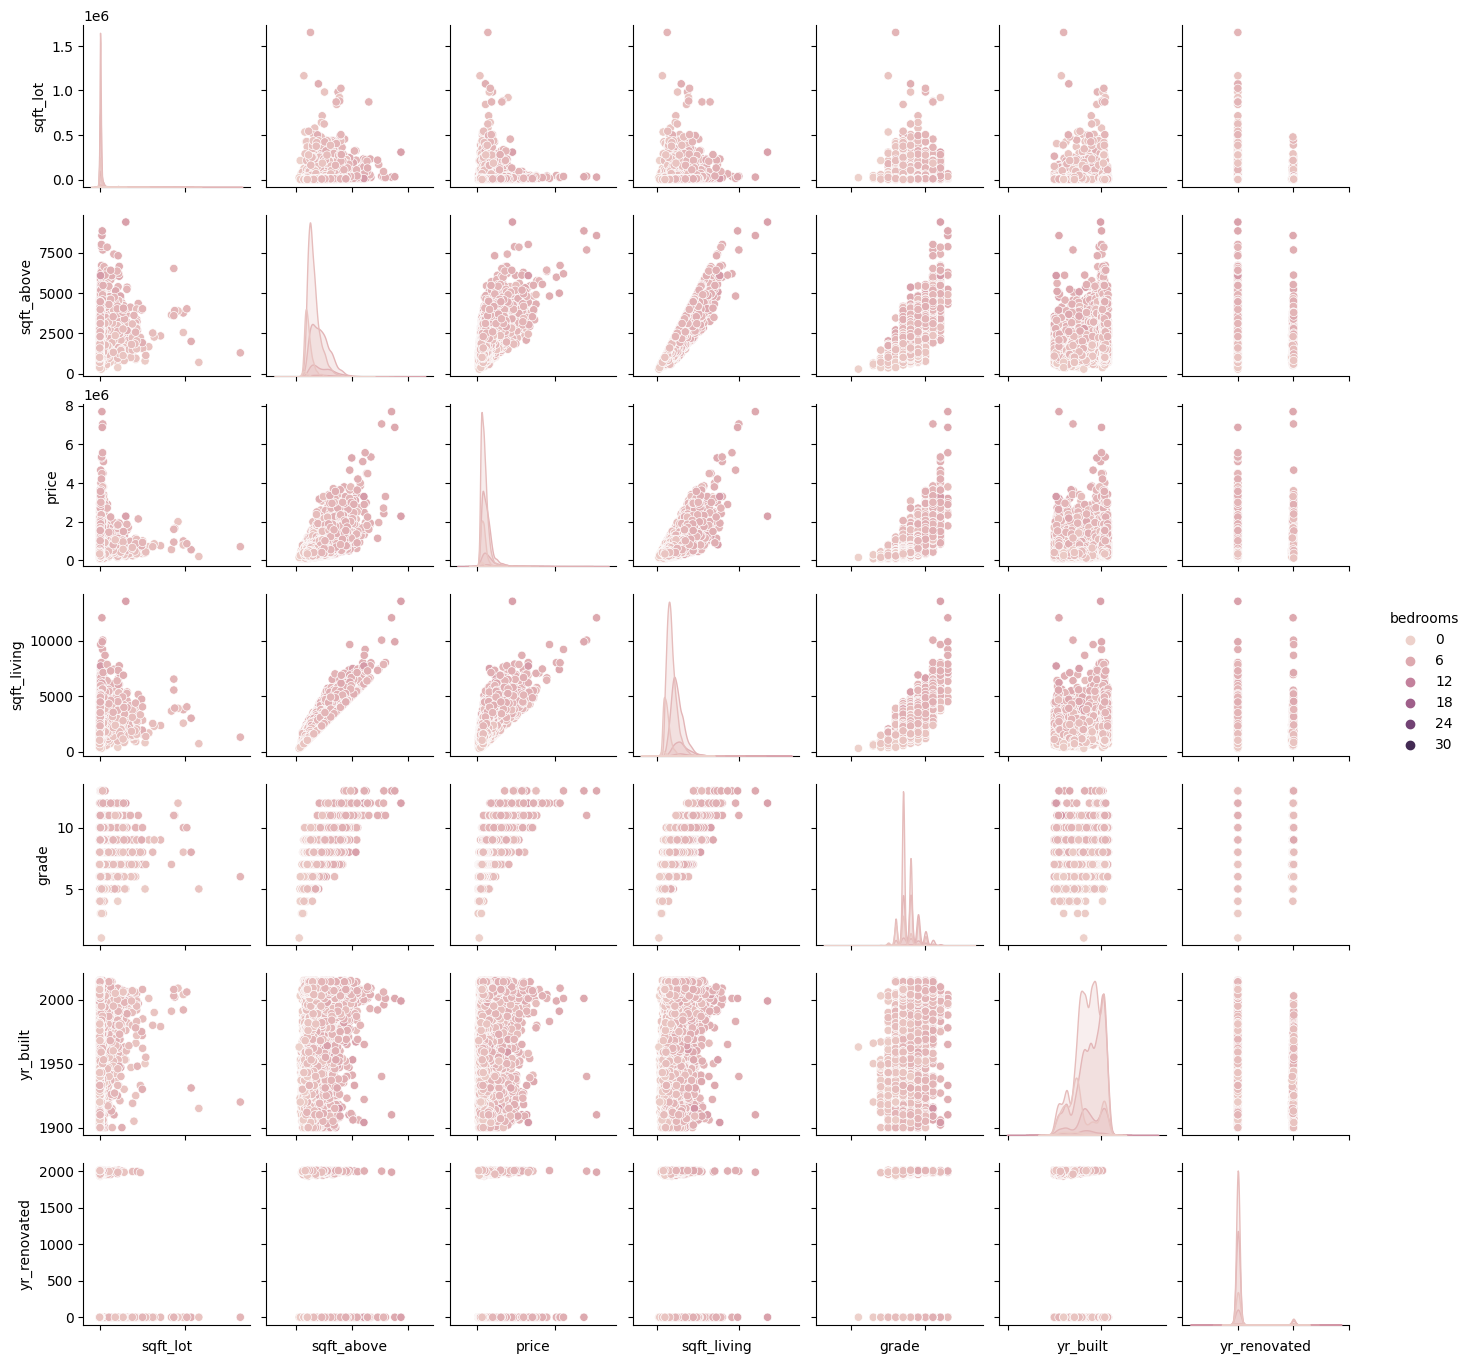

In [124]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms','grade','yr_built','yr_renovated']]
                 ,hue='bedrooms',size=2)
g.set(xticklabels=[])

From the above plot it is clear for a linear regression for sqft_living & price, 

So lets plot them in a joint plot to explore more on the data. 

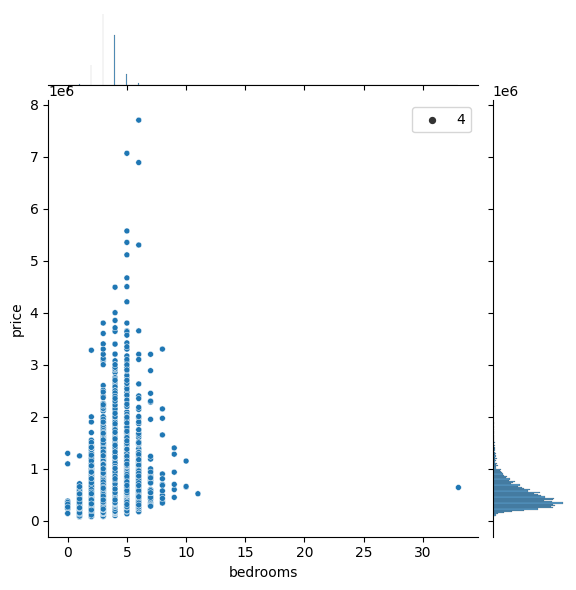

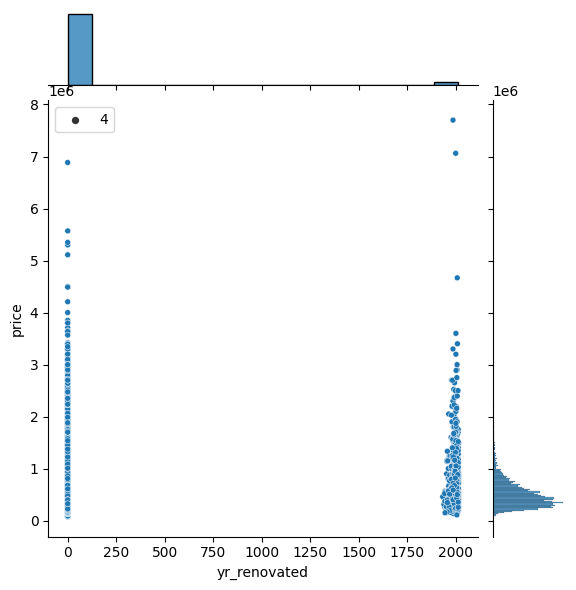

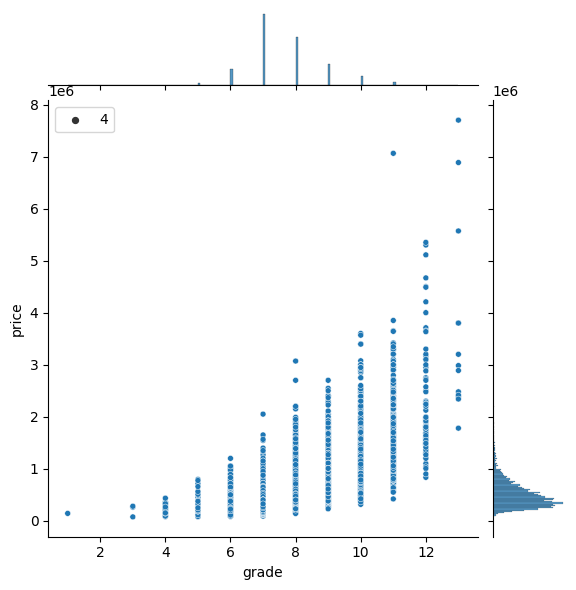

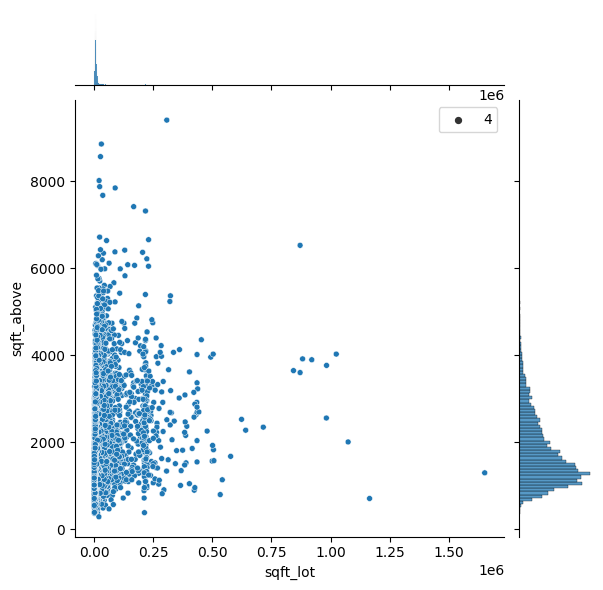

In [125]:
sns.jointplot(x='bedrooms',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='yr_renovated',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='grade',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='sqft_lot',y='sqft_above',data=dataset,kind='scatter',size=4)

#Co relation between Variables

We will use heatmap to view the co relation between variables


<Axes: >

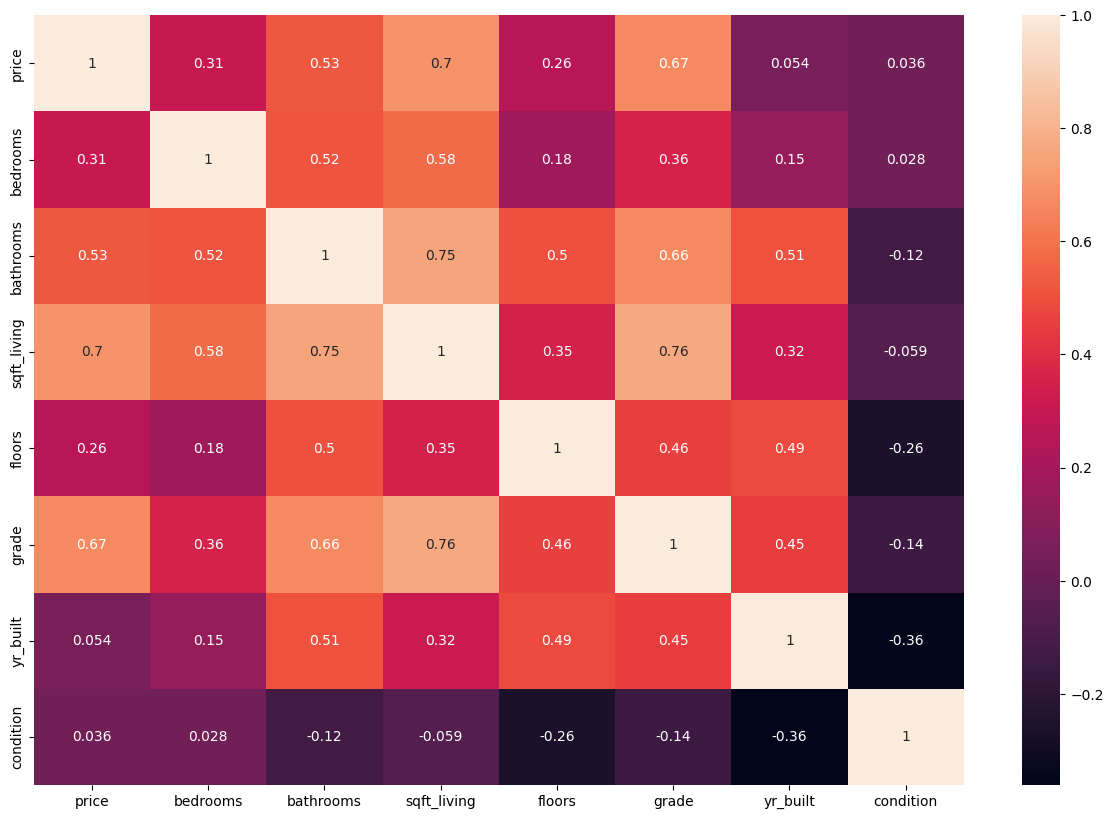

In [126]:
plt.figure(figsize=(15,10))
columns =['price','bedrooms','bathrooms','sqft_living','floors','grade','yr_built','condition']
sns.heatmap(dataset[columns].corr(),annot=True)

#Model on the train data
Model training is the process of using a labeled dataset and a machine learning algorithm to learn the patterns and relationships in the data and create a predictive model. This involves preparing and transforming the data, selecting an appropriate algorithm, training the model, evaluating its performance, fine-tuning the model parameters, and deploying the trained model. The goal of model training is to create a model that accurately predicts outcomes on new, unlabeled data and can be used to make decisions or solve problems in various fields such as finance, healthcare, and marketing. Python provides various libraries to train machine learning models, and the specific steps and implementation depend on the choice of algorithm and the task at hand.
We will start building our model using different regression models

In [127]:
# X(Independent variables) and y(target variables) 
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [128]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#Multiple Linear Regression

Fitting the train set to multiple linear regression and getting the score o

In [129]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

#Decision Tree

In [130]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

#Random forest

In [131]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

#Now calculate the model score to understand how our model performed along with the explained variance score.

In [132]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  69
Decision tree  Regression Model Score is  75
Random Forest Regression Model Score is  88


,Model,Score,Explained Variance Score
2,Random forest Regression,0.88011,0.846248
1,Decision Tree,0.74962,0.730713
0,Multiple Linear Regression,0.68779,0.527528


Based on the aforementioned analysis, it is evident that the accuracy of the random forest model is 88% and the explained variance score is 0.84. Thus, the random forest algorithm appears to be a suitable choice for predicting house prices. However, it is worth noting that there may be other regression models that could potentially yield better results with this dataset.